In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score , mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =  pd.read_csv('car_price_prediction.csv')

## Explore Data

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
data.shape

(19237, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
data.duplicated().sum()

313

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(18924, 18)

In [11]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# Analysis

In [12]:
data.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [13]:
for col in data.columns:
    print(col,":",data[col].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


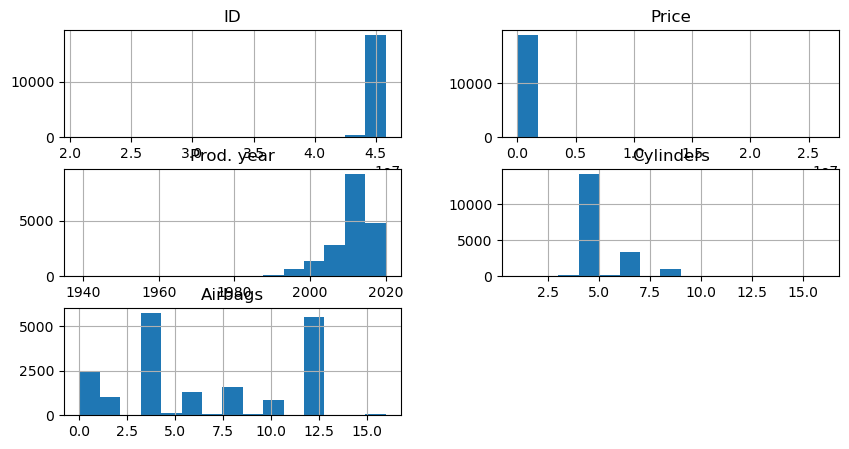

In [14]:
data.hist(bins=15,figsize=(10,5))
plt.show()

In [15]:
top10cars = data.Manufacturer.value_counts().sort_values(ascending = False)[ :10]
top10cars

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: Manufacturer, dtype: int64

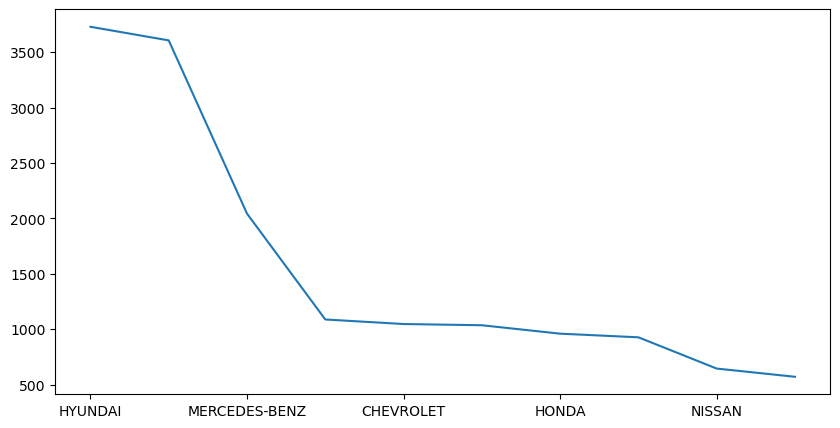

In [16]:
top10cars.plot(figsize=(10,5))
plt.show()

In [17]:
top10meanPrice = [data[data['Manufacturer']==i]['Price'].mean() for i in list(top10cars.index)]
top10meanPrice

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

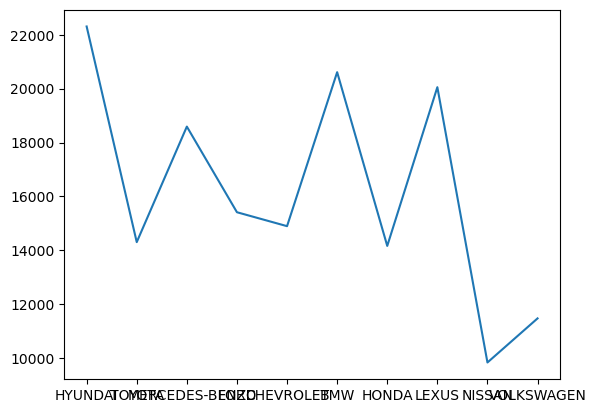

In [18]:
plt.plot(top10cars.index,top10meanPrice)

In [19]:
data.corr()

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


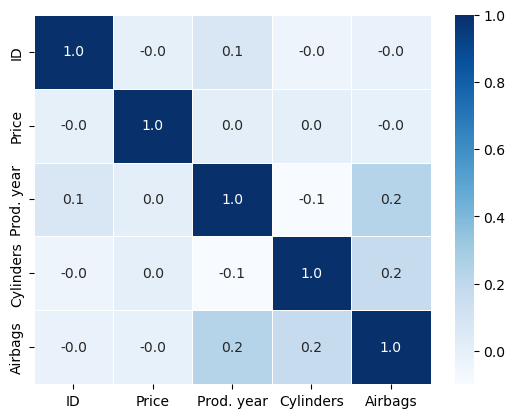

In [20]:
sns.heatmap(data.corr(),annot = True,fmt='0.1f',linewidth=0.5,cmap='Blues')
plt.show()

In [21]:
data_object = data.select_dtypes(include= object)
data_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Levy              18924 non-null  object
 1   Manufacturer      18924 non-null  object
 2   Model             18924 non-null  object
 3   Category          18924 non-null  object
 4   Leather interior  18924 non-null  object
 5   Fuel type         18924 non-null  object
 6   Engine volume     18924 non-null  object
 7   Mileage           18924 non-null  object
 8   Gear box type     18924 non-null  object
 9   Drive wheels      18924 non-null  object
 10  Doors             18924 non-null  object
 11  Wheel             18924 non-null  object
 12  Color             18924 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


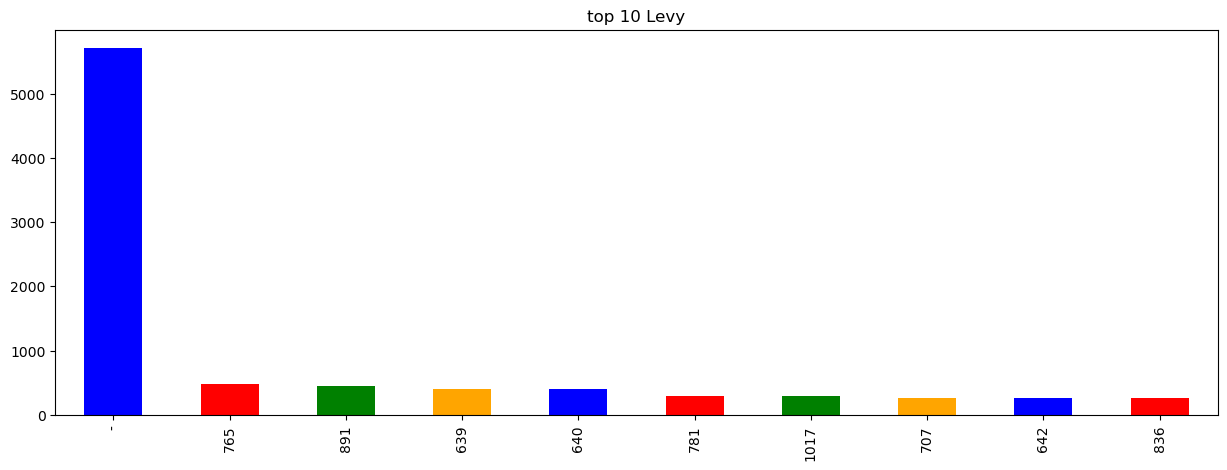

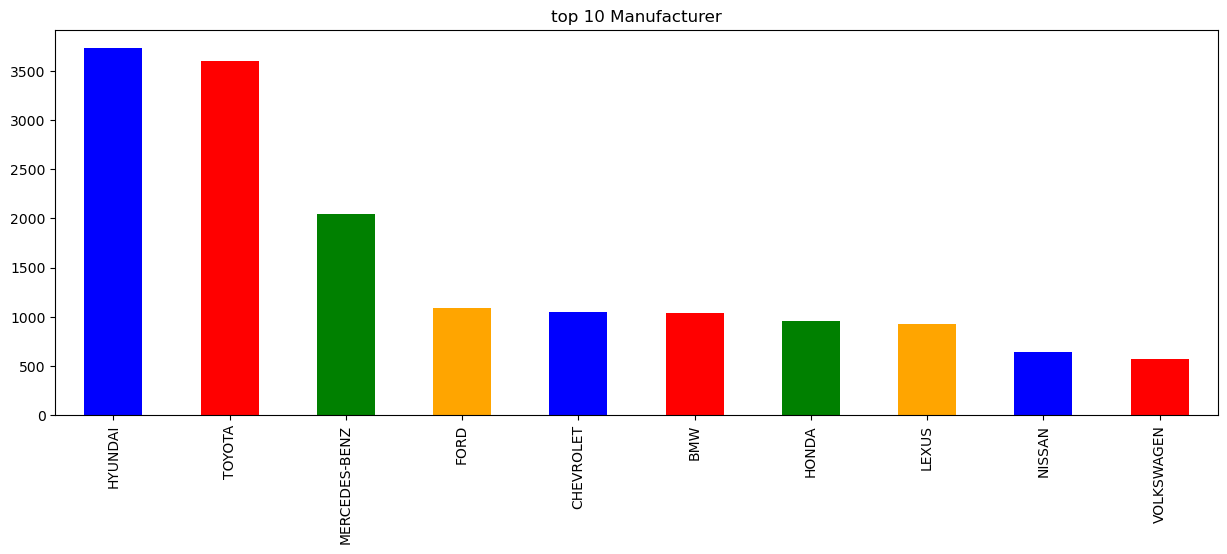

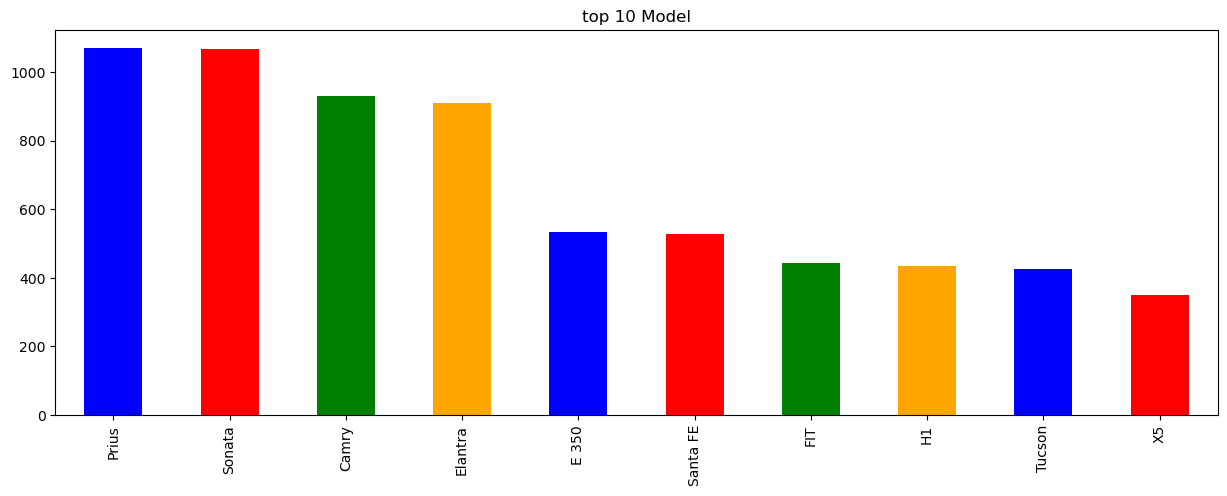

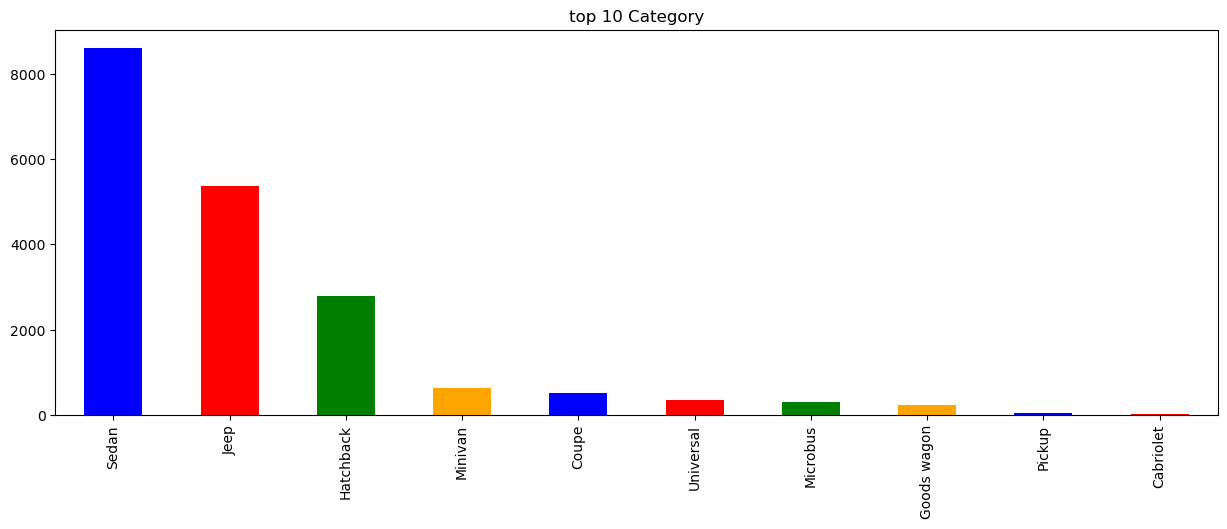

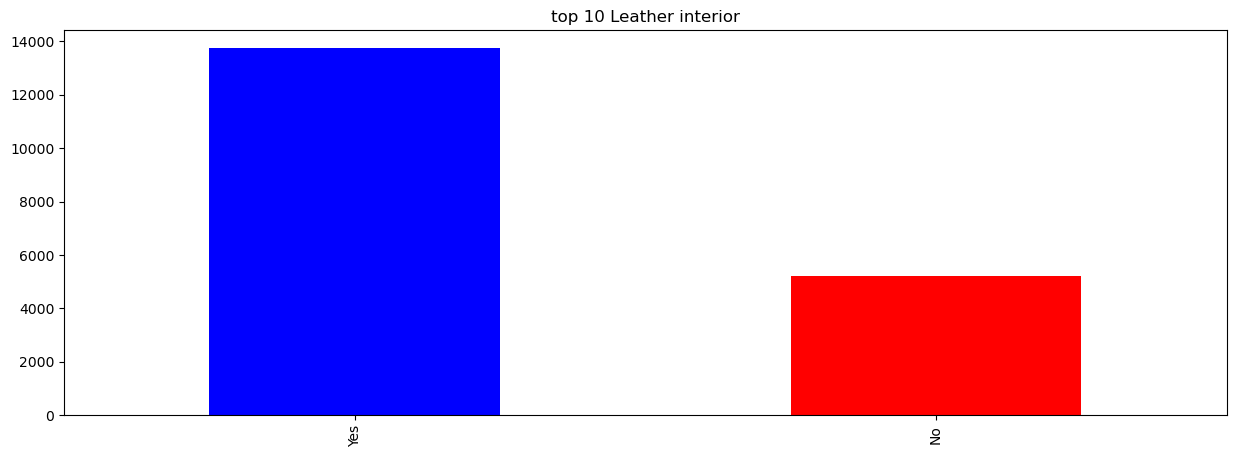

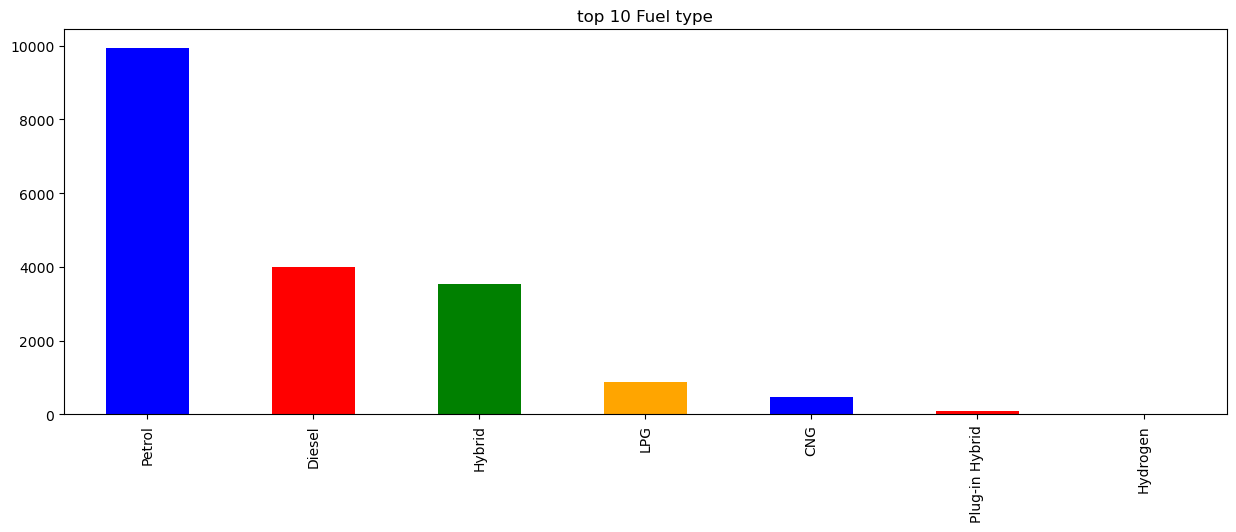

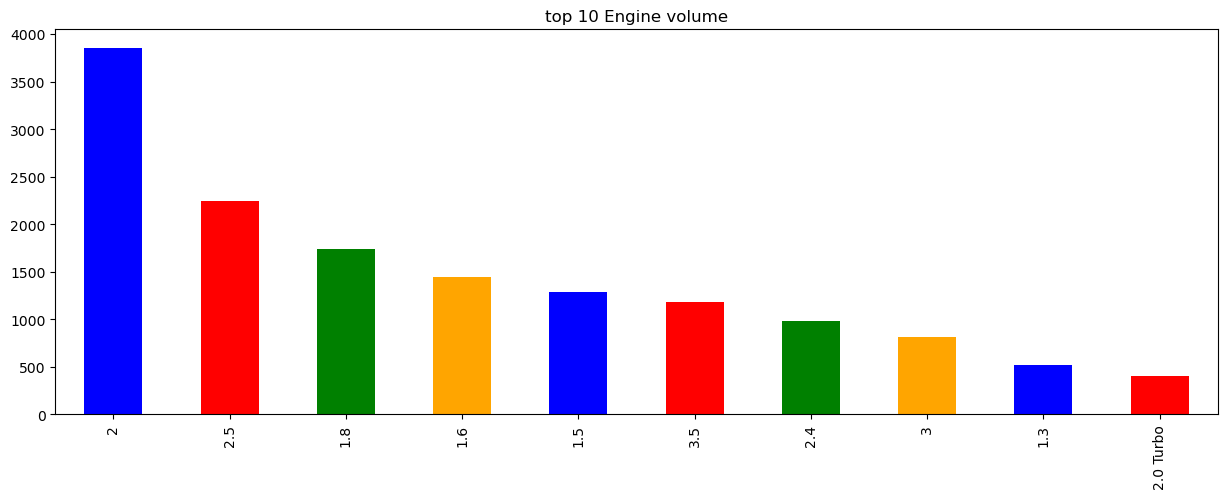

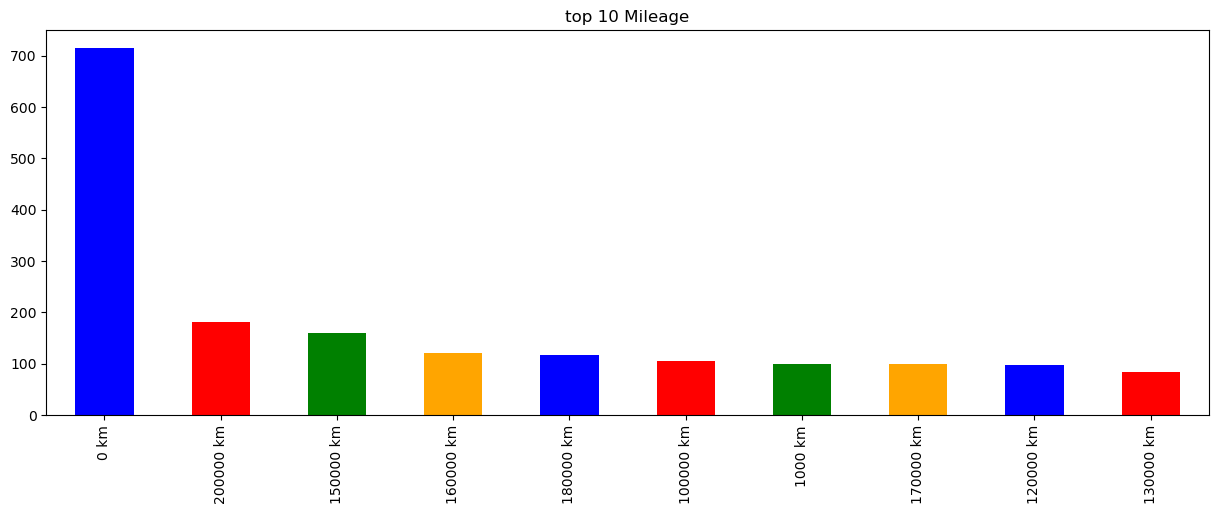

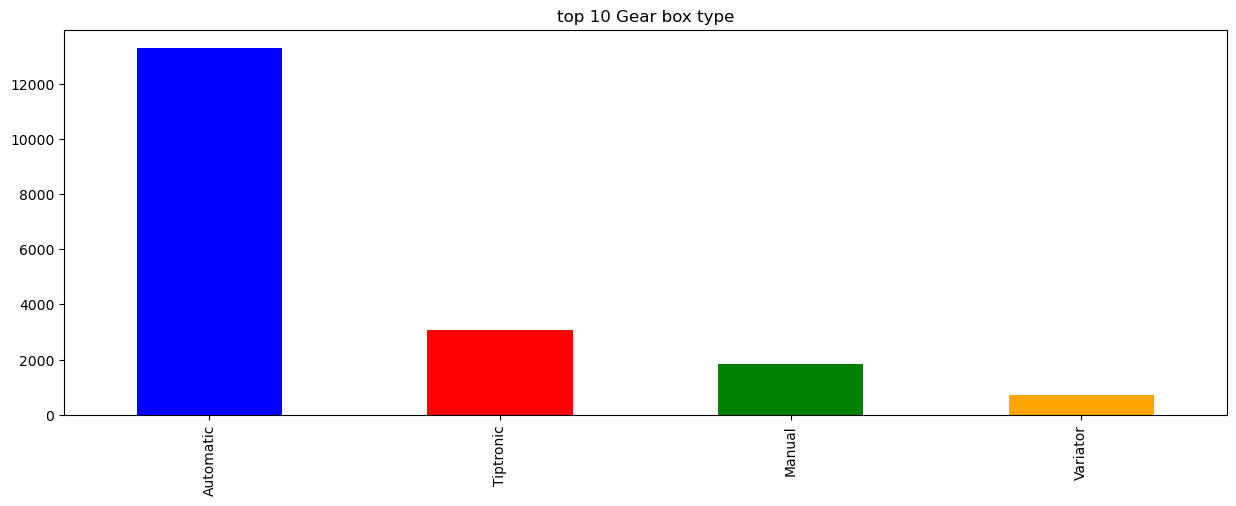

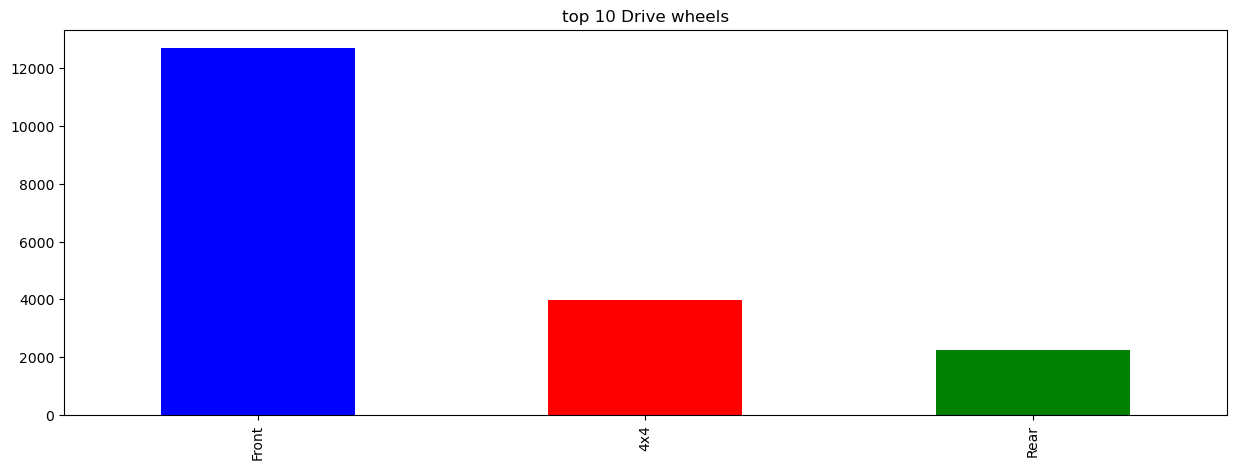

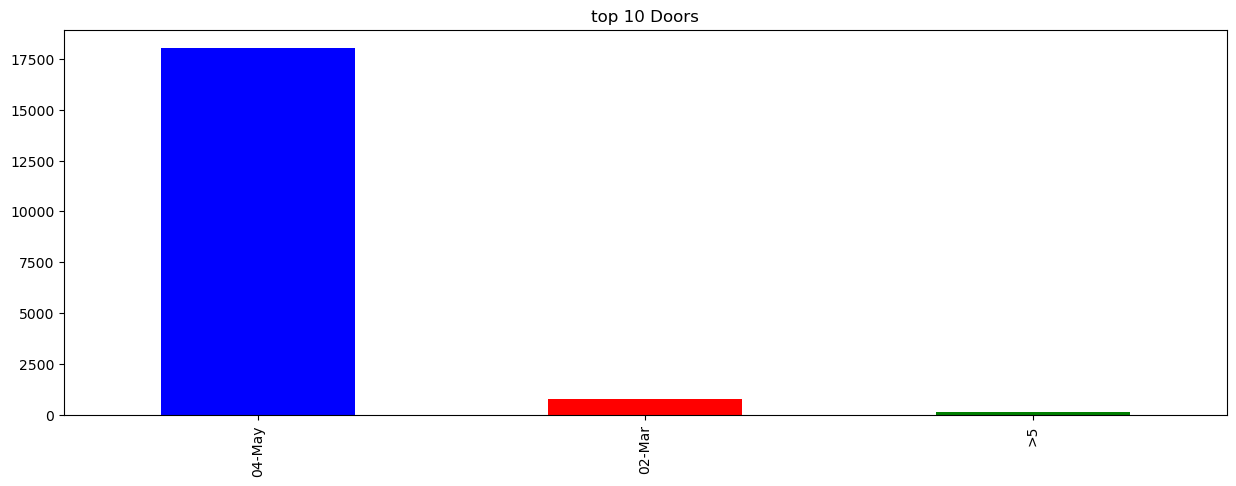

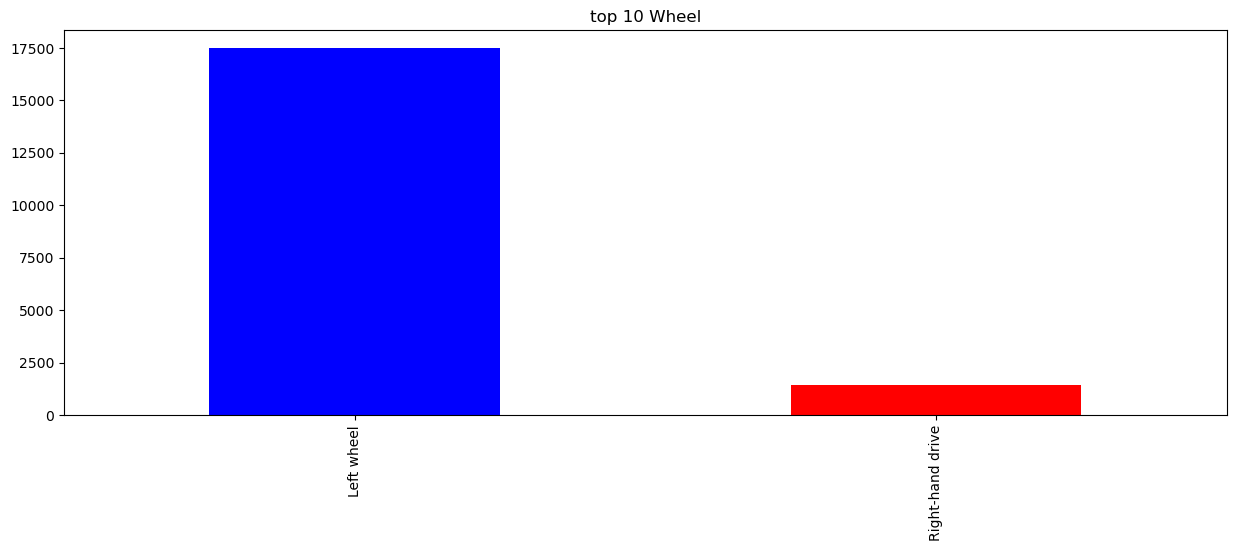

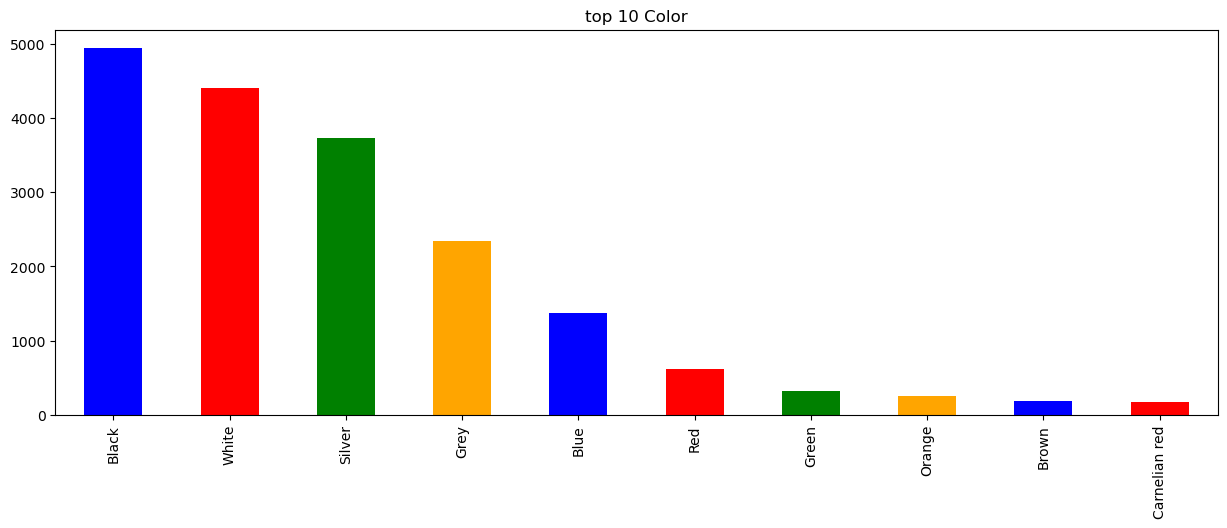

In [22]:
for col in data_object:
    plt.figure(figsize=(15,5))
    top10 = data[col].value_counts()[:10]
    colors = ['blue','red','green','orange']
    top10.plot(kind = 'bar',color = colors)
    plt.title('top 10'+" "+col)
    plt.show()

## Processing Data

In [23]:
data = data.drop(['ID','Doors'],axis = 1)
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4


### Date

In [24]:
import datetime
dtime = datetime.datetime.now()
dtime

datetime.datetime(2023, 12, 22, 18, 38, 47, 292234)

In [25]:
data['Age'] = dtime.year - data['Prod. year']
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,24
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,12
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,13
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4,16


In [26]:
data = data.drop('Prod. year',axis = 1)
data

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,24
19233,15681,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,12
19234,26108,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,13
19235,5331,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4,16


### Levy

In [27]:
data.Levy.replace({'-' : '0'},inplace = True)
data['Levy'] = data['Levy'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  object 
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(1), int32(1), int64(3), objec

In [28]:
data['Mileage'].str.replace('km','')

0        186005 
1        192000 
2        200000 
3        168966 
4         91901 
          ...   
19232    300000 
19233    161600 
19234    116365 
19235     51258 
19236    186923 
Name: Mileage, Length: 18924, dtype: object

In [29]:
data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags', 'Age'],
      dtype='object')

In [30]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

## Engine volume

In [31]:
data['Engine volume'] = data['Engine volume'].str.replace('Turbo','')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  object 
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(1), int32(1), int64(3), objec

In [33]:
data['Engine volume'] = data['Engine volume'].astype(float)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(2), int32(1), int64(3), objec

## Outlier

In [35]:
data_numeric = data.select_dtypes(exclude = 'object')
for col in data_numeric:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    outlier = ((data_numeric[col]>high)|(data_numeric[col]<low)).sum()
    total = data_numeric[col].shape[0]
    print(f"Total Outlier in {col} are : {outlier}--{round(100*(outlier)/total,2)}")
    if outlier > 0 :
       data = data.loc[(data[col]<= high) & (data[col]>=low)]                                              
                    
                                                     
                                                     

Total Outlier in Price are : 1055--5.57
Total Outlier in Levy are : 172--0.91
Total Outlier in Engine volume are : 1358--7.18
Total Outlier in Cylinders are : 4765--25.18
Total Outlier in Airbags are : 0--0.0
Total Outlier in Age are : 1777--9.39


## Transform Data

In [36]:
dobject = data.select_dtypes(include = 'object')
dnumeric = data.select_dtypes(exclude = 'object')

In [37]:
la = LabelEncoder()


In [38]:
for i in range(0,dobject.shape[1]):
    dobject.iloc[:,i] = la.fit_transform(dobject.iloc[:,i])
    

In [39]:
dobject

,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color
2,16,347,3,0,4,2493,3,1,1,1
3,12,334,4,1,2,1954,0,0,0,14
4,16,347,3,1,4,5679,0,1,0,12
5,17,683,4,1,1,1778,0,1,0,14
6,43,616,3,1,2,3046,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...
19230,43,616,3,1,2,3364,0,1,0,12
19233,17,697,8,1,4,1795,2,1,0,11
19234,17,770,4,1,1,533,0,1,0,7
19235,6,213,4,1,1,4225,0,1,0,1


In [40]:
data = pd.concat([dobject,dnumeric],axis = 1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12240 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      12240 non-null  int32  
 1   Model             12240 non-null  int32  
 2   Category          12240 non-null  int32  
 3   Leather interior  12240 non-null  int32  
 4   Fuel type         12240 non-null  int32  
 5   Mileage           12240 non-null  int32  
 6   Gear box type     12240 non-null  int32  
 7   Drive wheels      12240 non-null  int32  
 8   Wheel             12240 non-null  int32  
 9   Color             12240 non-null  int32  
 10  Price             12240 non-null  int64  
 11  Levy              12240 non-null  int32  
 12  Engine volume     12240 non-null  float64
 13  Cylinders         12240 non-null  float64
 14  Airbags           12240 non-null  int64  
 15  Age               12240 non-null  int64  
dtypes: float64(2), int32(11), int64(3)
memor

## Model

In [47]:
X = data.drop('Price',axis = 1)
y = data.Price

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=50)

In [56]:

Algorithms = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor",
"GradientBoostingRegressor","XGBRegressor","SVR"]
R2 = []
RMSE = []

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
def models(model):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    r2 = r2_score(pre,y_test)
    rmse = np.sqrt(mean_squared_error(pre,y_test))
    R2.append(r2)
    RMSE.append(rmse)
    
    score = model.score(X_test,y_test)
    print(f"The Score of model is :{score}")
    
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = XGBRegressor()
model6 = SVR()
    
models(model1)   
models(model2)   
models(model3)   
models(model4)   
models(model5)   
models(model6)



The Score of model is :0.2228011721959826
The Score of model is :0.6051167900987586
The Score of model is :0.7738792440878534
The Score of model is :0.6608682004738013
The Score of model is :0.77686461641113
The Score of model is :-0.00944820051346107


In [57]:
pd.DataFrame({"Algorithms":Algorithms,"R2_score":R2,"Rmse":RMSE})

,Algorithms,R2_score,Rmse
0,LinearRegression,-2.749705,10202.008452
1,DecisionTreeRegressor,0.605286,7272.001247
2,RandomForestRegressor,0.720576,5502.877244
3,GradientBoostingRegressor,0.368068,6739.130521
4,XGBRegressor,0.726232,5466.430520
5,SVR,-6298.957843,11626.838221


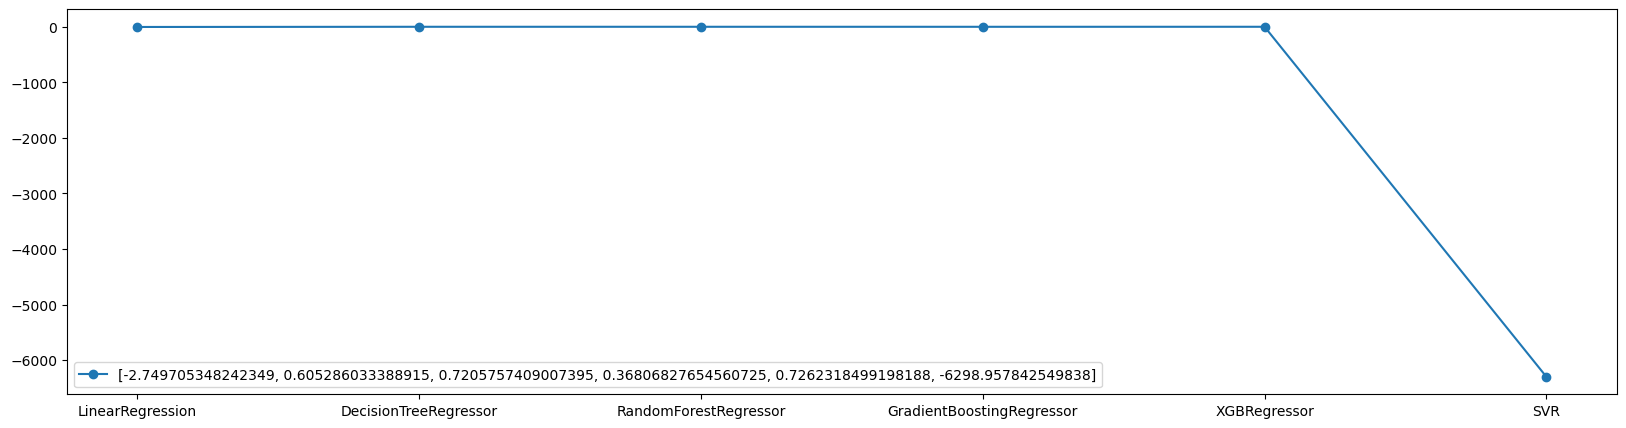

In [78]:
fig,sx = plt.subplots(figsize=(20,5))
plt.plot(Algorithms,R2,label=R2,marker = 'o')
plt.legend()
plt.show()


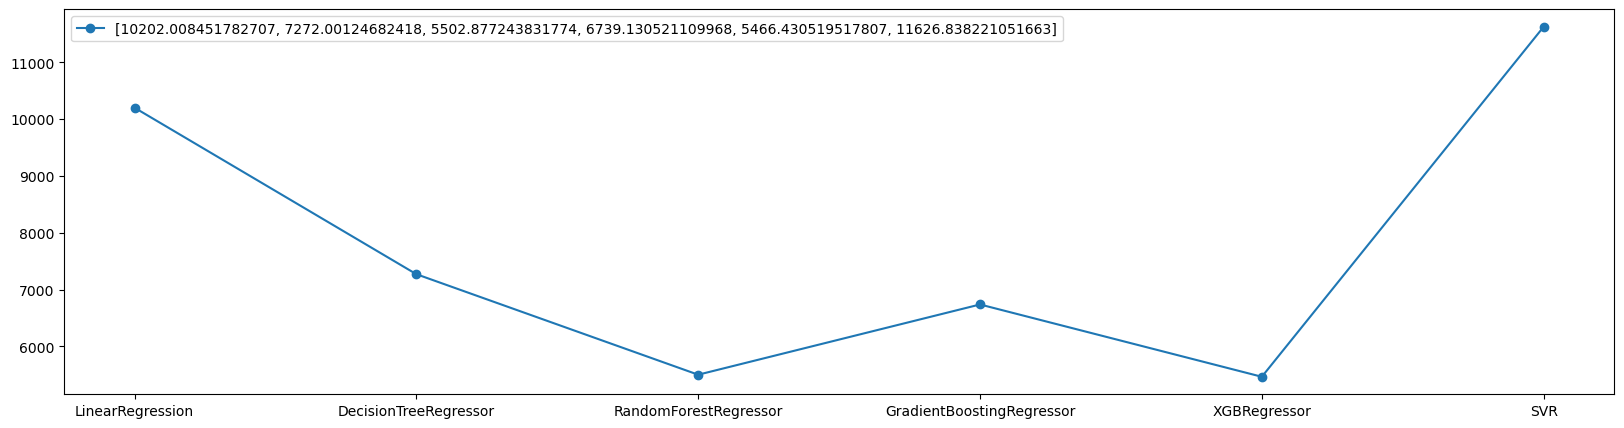

In [77]:
fig,sx = plt.subplots(figsize=(20,5))
plt.plot(Algorithms,RMSE,label=RMSE,marker = 'o')
plt.legend()
plt.show()

## Using My Model To Predict New Data


In [84]:
import pickle
file_name = 'Cars_predictions.sav'
pickle.dump(model5,open(file_name, 'wb'))